# C-grid interpolation: motivation and introduction

In [delandmeter et al., 2019](https://www.geosci-model-dev.net/12/3571/2019/), we developed a specific interpolator for C-grids. The construction of this interpolator in 2D and 3D grids, for rectilinear and curvilinear meshes, is described in the paper and implemented in [Parcels code](http://www.oceanparcels.org) and this repository.

In this notebook, we develop the motivation to this approach, showing why a specific interpolator is necessary for C-grids, using a simple benchmark.

## Benchmark: conservative analytical flow

Let's define the simple flow:

\begin{cases}
u &= |x|\\
v &= -y \: \text{sign}(x),
\end{cases}

for wich the continuity equation $u_x + v_y = 0$ holds.

To visualize the flow, let's integrate the trajectory of 40 particles (Fig. 1)
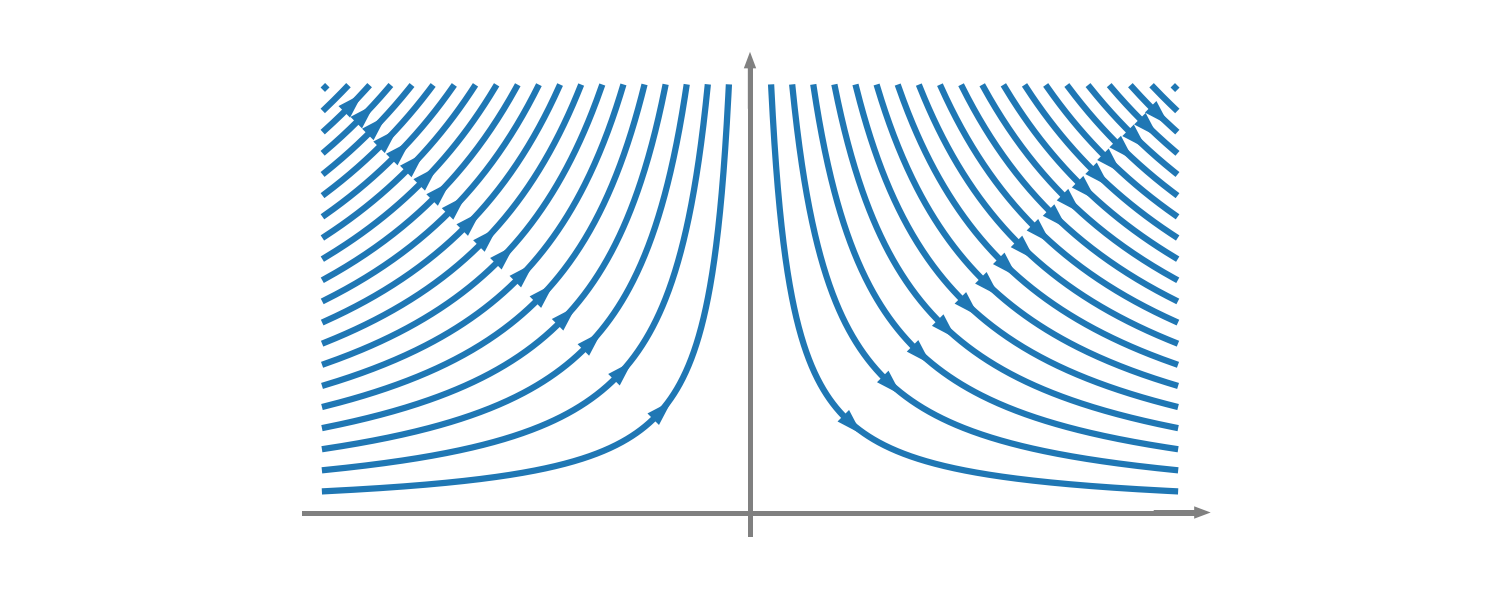
<h5 align="center"> Fig. 1: Analytical flow on the domain [-1:1]x[0:1].
    
### A-grid interpolation

Let's now interpolate the field on a A-grid. To do so, we mesh the domain into 2 cells with $dx=1$. One cell for negative $x$ and the other cell for positive $x$.

The field discretised on the A-grid (with nodes in black on Fig. 2) is interpolated following Eq. 1 of the paper. Integrating the particles on the discretised field leads to a perfect trajectory:
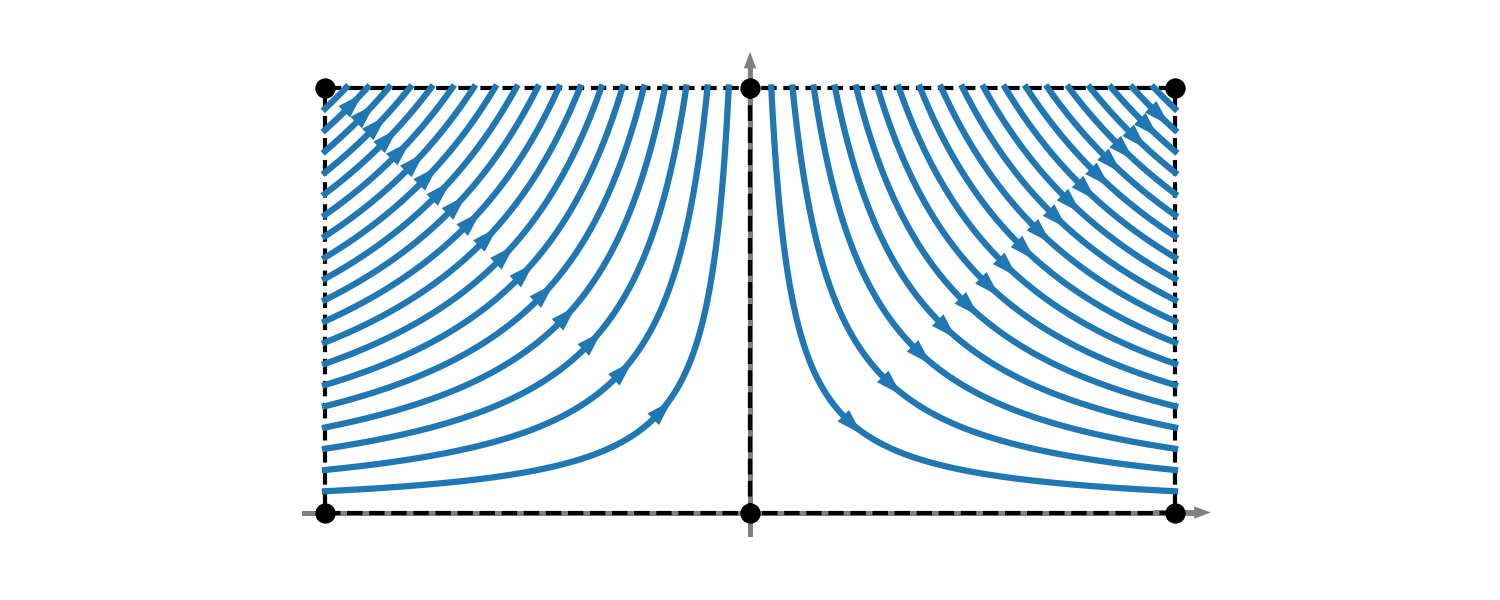
<h5 align="center"> Fig. 2: Particle trajectories on a A-grid using 2 mesh cells. Nodal values are located on the mesh vertices (in black). </h5> 

It is not luck that the particles are perfectly integrated, even on a coarse mesh. This results from the original flow which is bi-linear, such as the A-grid interpolator.

### C-grid mesh

Let's now build a C-grid mesh of the same domain, again with 2 cells with $dx=1$ (Fig. 3).
Each cell has only 2 U-nodes (in red) and 2 V-nodes (in green).

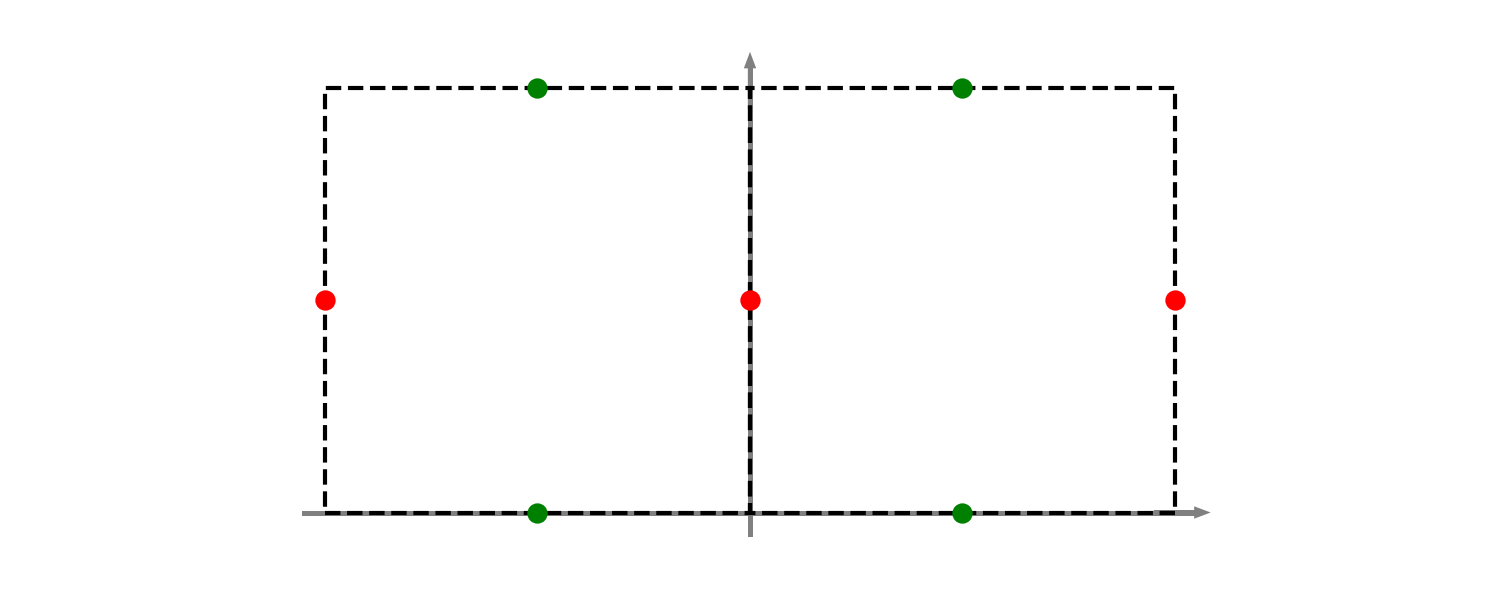

<h5 align="center"> Fig. 3: C-grid mesh. </h5>

#### Two A staggered meshes

The C-grid mesh (Fig. 3) could be naively interpreted as the combination of two A staggered grids
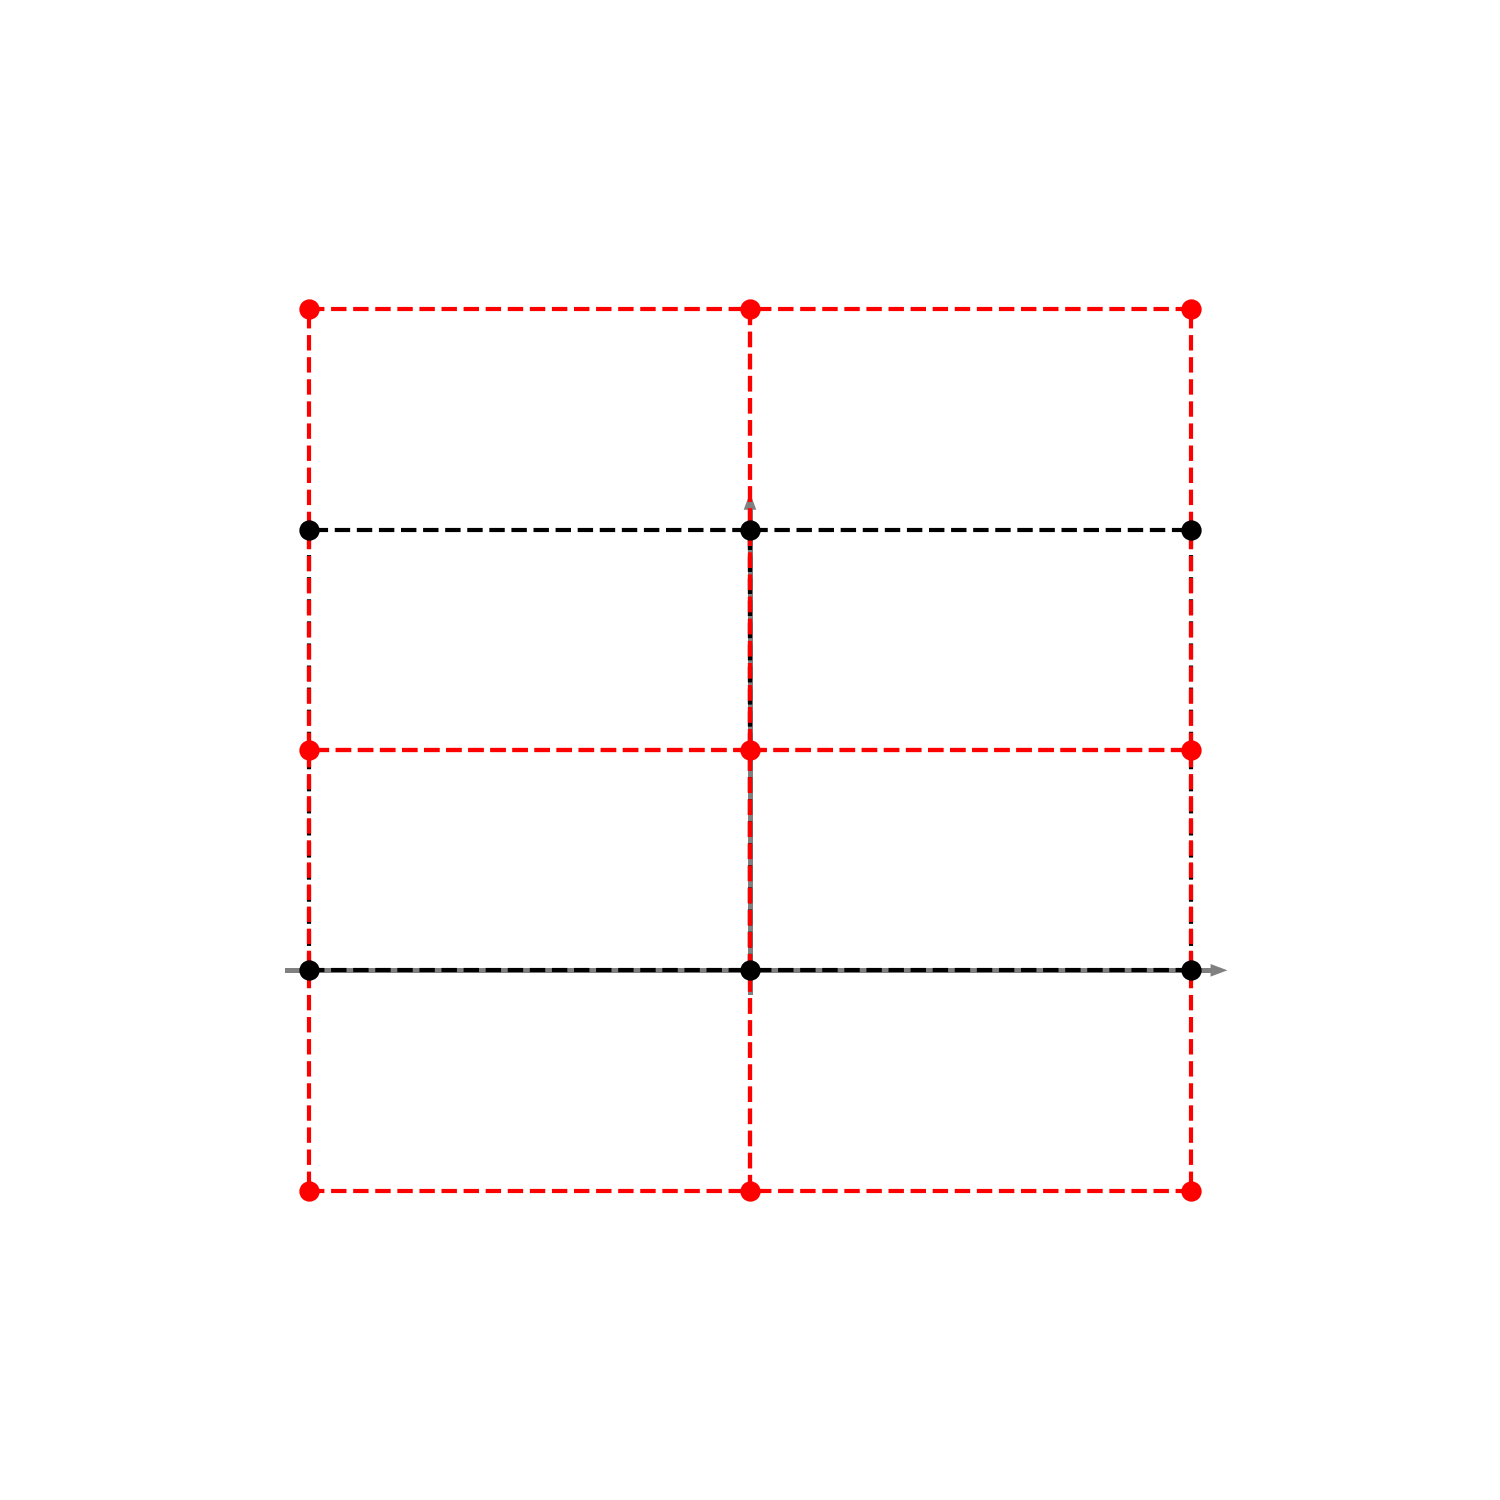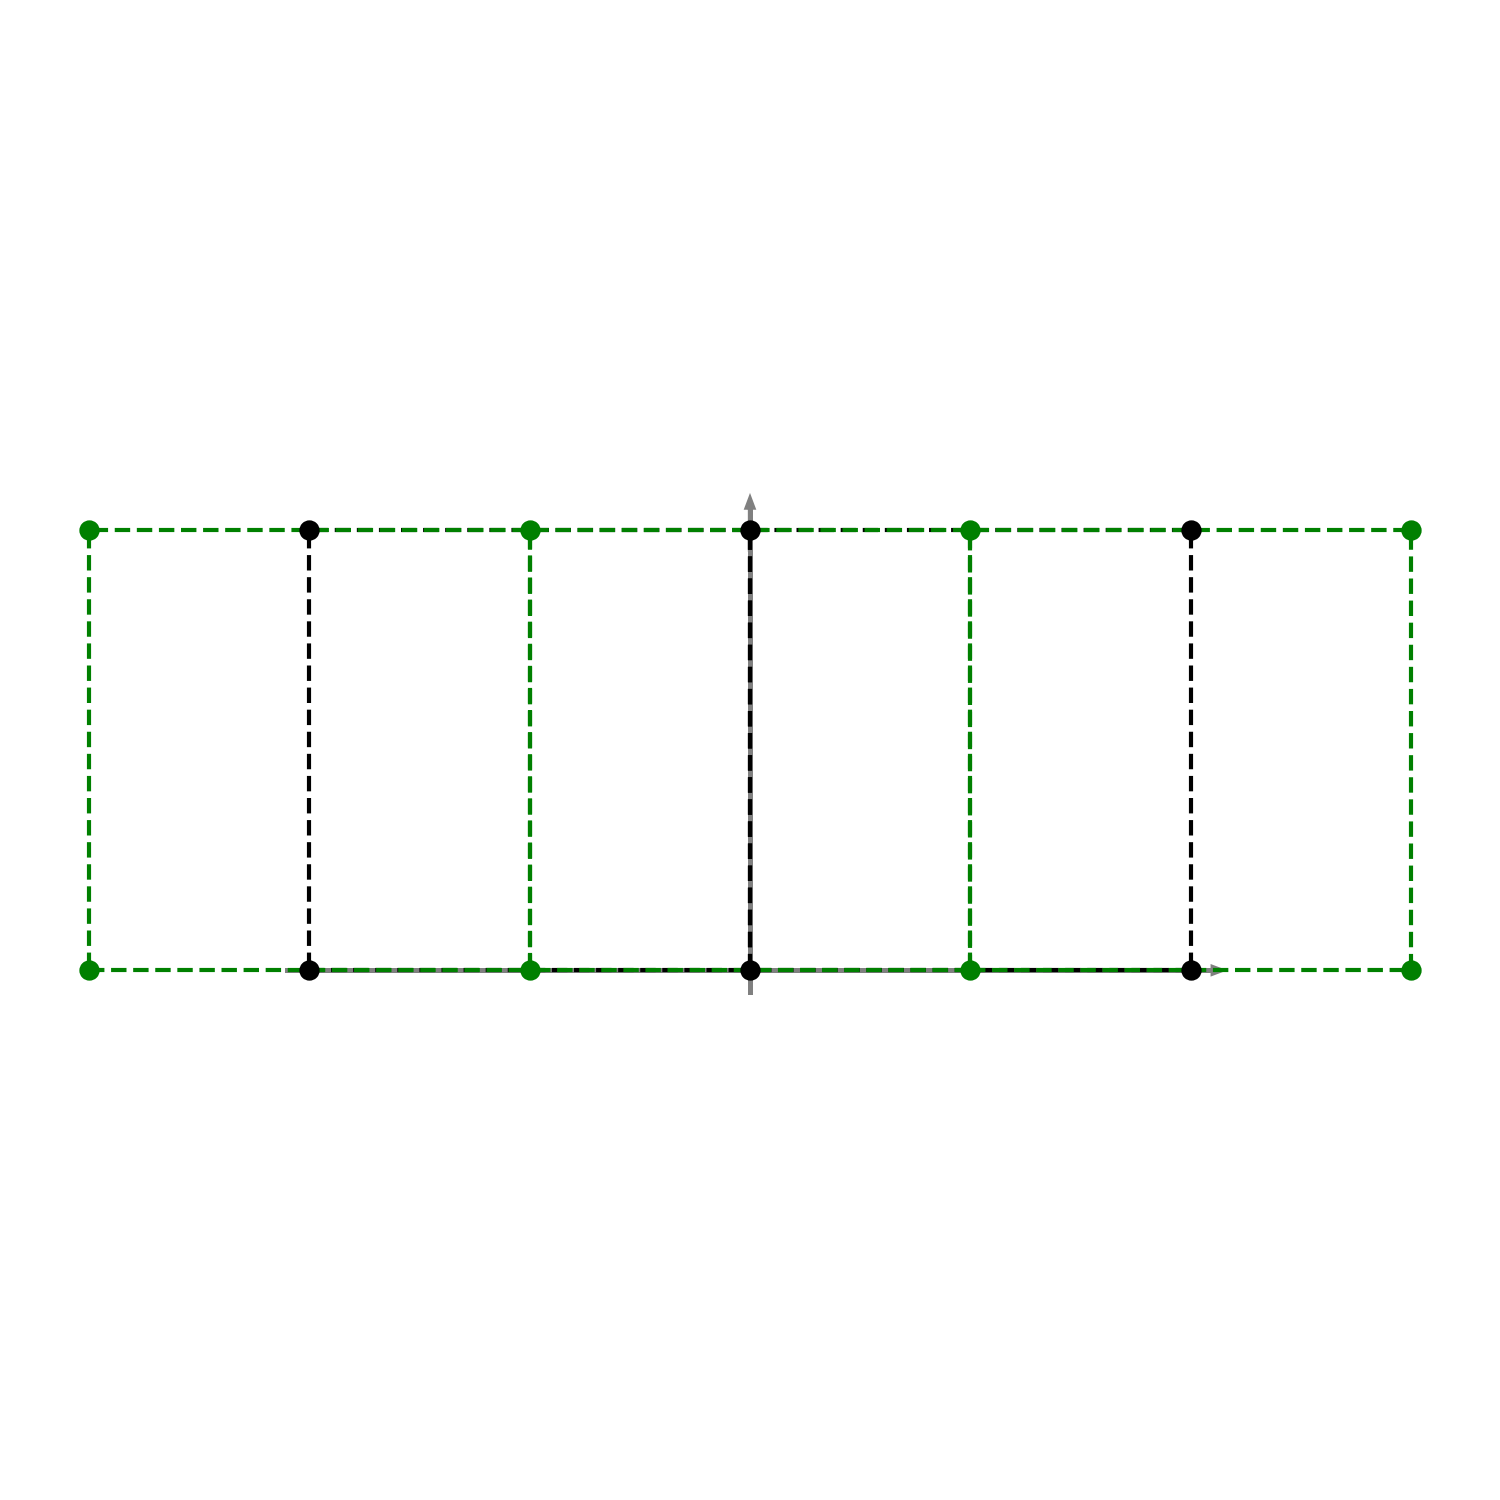